In [630]:
# pip install scipy

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind_from_stats

In [3]:
df = pd.read_csv('project_data.csv')
df=df.dropna()
syntax_df = pd.read_csv('Langs_Syntax.csv',index_col=0)
commands_list = syntax_df['Command']
syntax_df.set_index('Command')
df.to_csv('project_data_Clean.csv')
syntax_df

,Command,C,Python,Swift,PHP,Ruby,Go,JavaScript,Csharp,Python3,Java
0,Comments,// /*,"# """"""",// /*,// # /*,# =begin,// /*,// /*,// /*,"# """"""",// /*
1,Conditions,if if( case ? else else{ else,if else else: elif,if else,if if( else,if unless else elseif,if if( case else else{ else,if if( case else else{ else,if if( case else else{ else,if else else: elif,if if( case ? else else{ else
2,For,for for(,for,for,for for( oreach( foreach,for,for,for for(,for for(,for,for for(
3,While,while while(,while while(,while,while while(,while,NaN,while while(,while while(,while while(,while while(
4,do ... while,do do{ do,NaN,repeat,do do{,loop until,NaN,do do{ do,do do{ do,NaN,do do{ do
5,Func dec,return void,def,func,function,def,func,function function(,return void,def,return void
6,Varibales Dec,double int char String string float boolean lo...,<var_name>= <var_name>,var let,$ const,$ @ @@ _,var,let var,int char float double short var,<var_name>= <var_name> =,double int char String float boolean long shor...
7,Pointers,double* int* char* String* float* boolean* lon...,NaN,NaN,NaN,NaN,var <name>*,NaN,NaN,NaN,double* int* char* String* float* boolean* lon...
8,Comments length,0,0,0,0,0,0,0,0,0,0
9,code length,0,0,0,0,0,0,0,0,0,0


In [4]:
print("num of rows:",df.shape[0])

num of rows: 1511


In [5]:
df.drop_duplicates(subset=["Sol_Code"], inplace = True)

In [6]:
for i in syntax_df.index:
    if(pd.isnull(syntax_df['Command'][i])==True): continue
    new_col = syntax_df['Command'][i]
    df[new_col] = None
df['Variables Names'] = ''
df['Comments length'] = 0

df['Num_of_Lines']= 0
df['Lines_ave_len'] = 0
df['Vars_ave_len']=0
df['num_of_cases_uses']=0  
df['Num_of_Vars'] = 0

df

,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender,Comments,...,Varibales Dec,Pointers,Comments length,code length,Variables Names,Num_of_Lines,Lines_ave_len,Vars_ave_len,num_of_cases_uses,Num_of_Vars
0,TomGo,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/TomGo,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,5,Male,None,...,None,None,0,None,,0,0,0,0,0
2,buddhaben,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/buddhaben,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,None,...,None,None,0,None,,0,0,0,0,0
4,sameerkhan2k1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/sameerkhan2k1,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,None,...,None,None,0,None,,0,0,0,0,0
10,moe123,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/moe123,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Female,None,...,None,None,0,None,,0,0,0,0,0
12,user60612276,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/user60612276,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,None,...,None,None,0,None,,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,DanushiW,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/DanushiW,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,None,...,None,None,0,None,,0,0,0,0,0
2660,selimfidan2314,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/selimfidan2314,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,None,...,None,None,0,None,,0,0,0,0,0
2664,tomldac,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/tomldac,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,None,...,None,None,0,None,,0,0,0,0,0
2665,izasoliwoda,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/izasoliwoda,SQL Member Count,Java,/* write your SQL query below */\n\n#SELECT * ...,10,0,Female,None,...,None,None,0,None,,0,0,0,0,0


In [7]:
df[df['User_Gender']=='Female'].shape[0]

399

In [8]:
# adding vars features
def add_var_features(i,df):
    num_of_cases_uses = 0
    Variables_Names = df["Variables Names"][i]
    Variables_Names = re.sub('[^a-zA-Z ]+', ' ', Variables_Names)
    Variables_Names_list=Variables_Names.split()
    var_len = 0
    for var in Variables_Names_list:
        var_len += len(var)
        if(any(x.isupper() for x in var) and any(x.islower() for x in var)):
            num_of_cases_uses += 1
    df['Num_of_Vars'][i] = len(Variables_Names_list)
    if(len(Variables_Names_list)!=0):
        df['Vars_ave_len'][i] = (var_len/len(Variables_Names_list))
    df['num_of_cases_uses'][i] = num_of_cases_uses
    return df



# adding lines features
def add_lines_features(i, df):
    user_code = df['Sol_Code'][i]
    list_user_code=user_code.splitlines()
    lines_length = 0
    for ind,j in enumerate(list_user_code):
        if(len(j)<2):
            del list_user_code[ind]      
        else:
              lines_length += len(list_user_code[ind])
    average_lines_length = lines_length/len(list_user_code)
    df['Num_of_Lines'][i]= len(list_user_code)
    df['Lines_ave_len'][i] = average_lines_length
    df = add_var_features(i,df)
    return df



def find_lang_syntax(command,lang):
    syntax =[]
    Commands=syntax_df.loc[syntax_df['Command']==command, lang].to_string().split() ##finding comment syntax in c
    for com in Commands:
        syntax.append(com)
    return syntax

def catch_main(line, lang): # 'void' may indicate a main function witch is not fun that we want to calculate
    if (line.find('main')!=-1 or line.find('Main')!=-1 or line.find('/*')!=-1 or line.find('//')!=-1):
        return -1
    #also avoid notes (comments in the code)
    return 0

def Comments_counter(df,code, line, lang, row, syntax):
    counter = 0
    for syn in syntax:
        if(syn=='0'): continue
        string = ''
        if(syn=="/*" and code.find("/*")!=-1):
            comment = code[code.find("/*"):code.find("*/")]
            length = len(comment)
            counter += 1
            continue

        for letter in line:
            string = string+letter
            if(letter==' ' or letter=='\n' or letter=='\t'):
                string = ''
            else:
                if(string==syn):
                    counter += 1
                    length = 1
                    if(len(line)!=0): length = len(line)
                    df['Comments length'][row] += length
    return counter
                        
def Varibales_finder(df, line, lang, row, syntax):
    lang = str(lang)
    counter = 0
    index = 0
    var_list = []
    string = ''
    try:
        word = line.split()[0]
        if(lang=='Python' or lang =='Python3' or lang=='Ruby' or lang == 'JavaScript' or lang=='Csharp'):
            if(line.find("=")!=-1 and line.find("!=")==-1 and line.find('==')==-1 and line.find('<=')==-1 and line.find('>=')==-1 and line.find('+=')==-1 and line.find('-=')==-1):
                if(word.find("=")!=-1):
                    word = word[:word.find("=")]
                counter += 1
                var_list.append(word)

        if(lang!='Python' and lang !='Python3'): # lang != python3
            if(lang=='Go'):
                if(line.find(":=")!=-1):
                        var = line.split()[0]
                        if(var.find(":")!=-1):
                            var = var[:var.find(":")]
                        counter += 1
                        var_list.append(var)
            else:
                for syn in syntax:
                    if(word==syn and line.find("for")==-1 and line.find("while")==-1):
                        var = line.split()[1]
                        if(var.find("=")!=-1):
                            var = var[:var.find("=")]
                        counter += 1
                        var_list.append(var)
                    else:
                        if(word.find(syn)!=-1 and (syn=="$")):
                            if(word.find("+")==-1 and word.find("-")==-1 and word.find("(")==-1):
                                if(word.find("=")!=-1):
                                    word = word[:word.find("=")]
                                counter += 1
                                var_list.append(word)
    except IndexError: pass
    if (len(var_list)!=0 and var_list!=[]):
        df['Variables Names'][row]+=str(var_list).strip('[]')
    return counter

def count_commands(df, code, lang, syntax, command, row):

    counter = 0 # count num of commands
    string = ''
   
    for line in str(code).splitlines():
        if(command == 'Comments'):
            counter += Comments_counter(df,code, line, lang, row, syntax)
            continue
        if(command == 'Varibales Dec'):
            counter += Varibales_finder(df, line, lang, row, syntax)
            continue
        for letter in line: #for every code in c
            string = string+letter
            if(letter==' ' or letter=='\n' or letter=='\t'):
                string = ''
            else:
                i=-1
                for syn in syntax:
                    i +=1
                    if(i==0): continue
                    if(string==syn):
                        if(command == 'Func dec' and (lang=='Java' or lang == 'C' or lang == 'Csharp')):
                            counter += catch_main(line, lang)
                        counter +=1
                    else:
                        if(line.find(syn)!=-1):
                            counter +=1 
#             index += 1
    return counter

In [9]:
for i in df.index:
    df['Sol_Code'][i] = str(df['Sol_Code'][i])
    df['Programming_Lang'][i] = str(df['Programming_Lang'][i])
    user_code = df['Sol_Code'][i]
    code_lang = df['Programming_Lang'][i]
    for col in commands_list:
        if(pd.isna(col)==True): continue
        if(col!='code length'):
            Relative_Syntax = find_lang_syntax(col,code_lang)
            df[col][i]=count_commands(df, user_code, code_lang, Relative_Syntax, col, i)
        else:
            df[col][i] = len(df['Sol_Code'][i].split())
    df = add_lines_features(i, df)

<ipython-input-9-021aa8f4be9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sol_Code'][i] = str(df['Sol_Code'][i])
<ipython-input-9-021aa8f4be9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Programming_Lang'][i] = str(df['Programming_Lang'][i])
<ipython-input-8-4c6650c3666c>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comments length'][row] += length
<ipython-input-9-021aa8f4be9a>:10: SettingWithCopyWarning: 

In [10]:
df

###### note: the comment's and code's langth are by words, not by character!!

,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender,Comments,...,Varibales Dec,Pointers,Comments length,code length,Variables Names,Num_of_Lines,Lines_ave_len,Vars_ave_len,num_of_cases_uses,Num_of_Vars
0,TomGo,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/TomGo,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,5,Male,1,...,5,0,69,115,'N''K''min''result''index',32,25,3,0,5
2,buddhaben,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/buddhaben,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,2,...,1,0,112,111,'n',41,19,1,0,1
4,sameerkhan2k1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/sameerkhan2k1,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,4,...,4,0,117,137,'m''l''r''k',32,18,1,0,4
10,moe123,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/moe123,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Female,54,...,3,0,155,199,'s1''n''i',49,27,1,0,3
12,user60612276,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/user60612276,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male,1,...,5,0,330,178,'nonZeroCounts''minLen''start''result''charAsInt',45,23,7,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,DanushiW,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/DanushiW,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,7,...,0,0,0,29,,5,15,0,0,0
2660,selimfidan2314,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/selimfidan2314,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,7,...,0,0,24,25,,6,22,0,0,0
2664,tomldac,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/tomldac,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male,3,...,0,0,134,28,,2,16,0,0,0
2665,izasoliwoda,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/izasoliwoda,SQL Member Count,Java,/* write your SQL query below */\n\n#SELECT * ...,10,0,Female,4,...,0,0,167,34,,3,65,0,0,0


In [11]:
df["User_Gender"]=df["User_Gender"].replace('Male',0)
df["User_Gender"]=df["User_Gender"].replace('Female',1)
df.to_csv("project_data_syntax_commands.csv")

In [12]:
Female_df = df[df.User_Gender == 1]
Male_df = df[df.User_Gender == 0]

In [13]:
Female_df

,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender,Comments,...,Varibales Dec,Pointers,Comments length,code length,Variables Names,Num_of_Lines,Lines_ave_len,Vars_ave_len,num_of_cases_uses,Num_of_Vars
10,moe123,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/moe123,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,1,54,...,3,0,155,199,'s1''n''i',49,27,1,0,3
15,debasisdwivedy,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/debasisdwivedy,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,0,1,85,...,9,0,145,161,'str1''str2''len''res''s''k''i''j''count',80,22,2,0,9
18,DeviousBard,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/DeviousBard,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,0,1,1,...,6,0,260,159,'minWindowLen''minWindowStr''testSubWindow''k'...,45,39,7,3,6
29,elenapi,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/elenapi,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,-2,1,5,...,8,0,282,235,'start''end''maxstart''n''maxend''[]str''done'...,64,26,4,0,8
42,betterkenly,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/betterkenly,Min Window Substring,JavaScript,function MinWindowSubstring(strArr) { \n va...,10,0,1,1,...,18,0,107,150,"'var', 'str1''var', 'str2''var', 'answer''var'...",47,22,3,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,mega0319,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/mega0319,React Button Toggle,Java,import React from 'react';\nimport ReactDOM fr...,10,0,1,0,...,0,0,0,59,,25,15,0,0,0
2370,Jethet,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/Jethet,React Button Toggle,Java,import React from 'react';\nimport ReactDOM fr...,10,0,1,0,...,0,0,0,56,,28,17,0,0,0
2396,Lemos97,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/Lemos97,React Button Toggle,JavaScript,import React from 'react';\nimport ReactDOM fr...,10,0,1,1,...,3,0,0,56,'this.state''const''<button',26,16,5,0,4
2650,ManalPal1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/ManalPal1,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,1,3,...,0,0,0,27,,2,16,0,0,0


In [14]:
ind = ['Male','Female']
comm = syntax_df.Command.to_list()
comm.append("Num_of_Lines")
comm.append("Lines_ave_len")
comm.append("Num_of_Vars")
comm.append("Vars_ave_len")
comm.append("num_of_cases_uses")
comm.append("User_Score")
comm.append("User's_Comments")
gender_df = pd.DataFrame(index = ind, columns=comm)
gender_df
for Command in gender_df.columns:
    if(pd.isnull(Command)): continue
#     if(Command=="Vars_ave_len"):
#         gender_df[Command]['Female'] = Female_df[Command]
#         gender_df[Command]['Male'] = Male_df[Command]
    gender_df[Command]['Female'] = Female_df[Command].mean()
    gender_df[Command]['Male'] = Male_df[Command].mean()
gender_df = gender_df.T
gender_df


,Male,Female
Comments,4.41228,6.83208
Conditions,105.242,110.008
For,41.7782,42.802
While,3.27694,3.16792
do ... while,16.6491,12.9098
Func dec,68.015,73.5965
Varibales Dec,4.3396,4.42356
Pointers,1.01629,1.69674
Comments length,66.3333,65.0602
code length,71.6717,73.9073


In [15]:

code_length_df = gender_df.loc['code length',:]
code_length_df = pd.DataFrame(code_length_df)
code_length_df

,code length
Male,71.6717
Female,73.9073


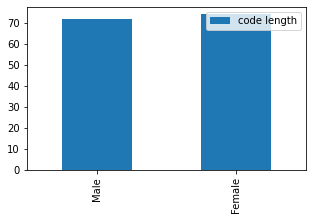

In [16]:
code_length_df.plot.bar(figsize=(5,3))
# Show Plot 
plt.show() 

In [17]:

fraph_gender_df = gender_df.drop('code length')

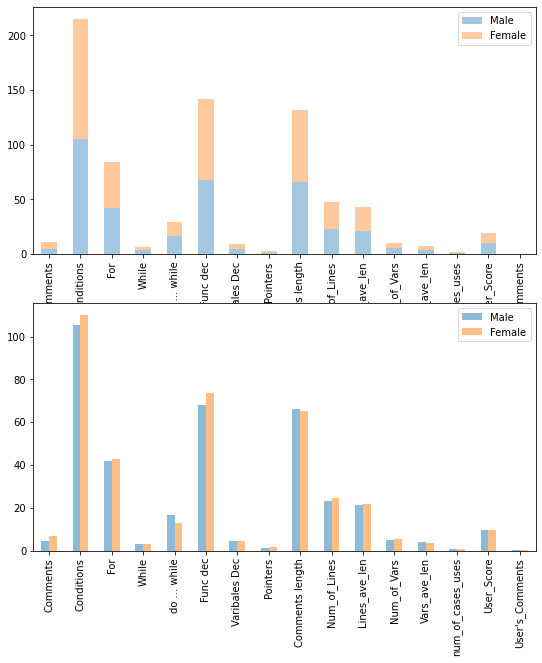

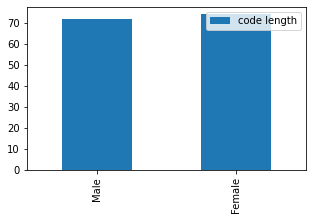

In [18]:
fig, axes = plt.subplots(nrows=2, figsize=(9, 10))
fraph_gender_df.plot(kind='bar', stacked=False, alpha=0.5, ax=axes[1])
fraph_gender_df.plot(kind='bar', stacked=True, alpha=0.4, ax=axes[0])
for ax in axes:
    ax.set_ylim(bottom=0)
    print('\n')
    
code_length_df.plot.bar(figsize=(5,3))
# Show Plot 
plt.show() 

In [19]:
Female_df['Programming_Lang'].describe()

count        399
unique        10
top       Csharp
freq          88
Name: Programming_Lang, dtype: object

In [20]:
Male_df['Programming_Lang'].describe()

count      798
unique      10
top       Java
freq       120
Name: Programming_Lang, dtype: object

In [21]:
df.drop_duplicates(subset=["Sol_Code"], inplace = True)


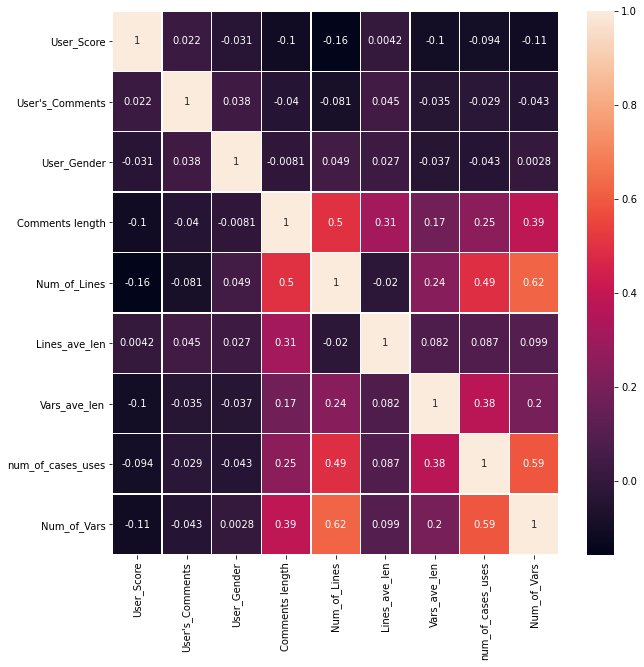

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [23]:
df

,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender,Comments,...,Varibales Dec,Pointers,Comments length,code length,Variables Names,Num_of_Lines,Lines_ave_len,Vars_ave_len,num_of_cases_uses,Num_of_Vars
0,TomGo,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/TomGo,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,5,0,1,...,5,0,69,115,'N''K''min''result''index',32,25,3,0,5
2,buddhaben,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/buddhaben,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,0,2,...,1,0,112,111,'n',41,19,1,0,1
4,sameerkhan2k1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/sameerkhan2k1,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,0,4,...,4,0,117,137,'m''l''r''k',32,18,1,0,4
10,moe123,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/moe123,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,1,54,...,3,0,155,199,'s1''n''i',49,27,1,0,3
12,user60612276,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/user60612276,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,0,1,...,5,0,330,178,'nonZeroCounts''minLen''start''result''charAsInt',45,23,7,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,DanushiW,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/DanushiW,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,0,7,...,0,0,0,29,,5,15,0,0,0
2660,selimfidan2314,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/selimfidan2314,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,0,7,...,0,0,24,25,,6,22,0,0,0
2664,tomldac,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/tomldac,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,0,3,...,0,0,134,28,,2,16,0,0,0
2665,izasoliwoda,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/izasoliwoda,SQL Member Count,Java,/* write your SQL query below */\n\n#SELECT * ...,10,0,1,4,...,0,0,167,34,,3,65,0,0,0


In [438]:
df["Permissions"] = 0 # private \ protected etc..
df["Empty_lines"] = 0 # empty line counting
df["inline_comments"] = 0# >0 if the comment is in the same line as the code
df["while_inside_for"] = 0
df["for_inside_for"] = 0
df["default_comments"] = 0 #count whether the usere deleted the default comments(=0) or left them(>0)
df["auxiliary_function"] = 0 # more then 2 functions
df["comments_next_to_func"] = 0 # comments that are declared before or after the function declaration
df["commets_type_//"] = 0
df["commets_type_/*"] = 0

In [455]:
def comments_by_type(code):
    counter_1 = counter_2 = 0
    counter_1 = len(re.findall("//",code))
    while(code.find("/*")!=-1 and code.find("*/")!=-1):
        counter_2+=1
        code = code[code.find("*/")+1:]
    return [counter_1, counter_2]


def func_dec_counter(code):
    pat1 = "static""\s""[a-zA-Z]{3}"".*""\s""\w+""\s*""("".*"")""\s*""{"
    pat2 = "p""[a-z]{4}[a-z]*""\s""[a-rt-z]{3}"".*""\s""\w+""\s*""("".*"")""\s*""{"
    x = re.findall(pat1, code)
    y = re.findall(pat2, code)
    counter = len(x) + len(y)
    return counter

def find_comments_before_after_func(code):
    count = 0
    code = code.splitlines()
    for i,line in enumerate(code):
        counter = func_dec_counter(line)
        if(counter>0):
            if(i!=0):
                last_line = code[i-1]
                if(last_line.find("//")!=-1 or last_line.find("*/")!=-1):
                    count +=1
            next_line = code[i+1]
            if(next_line.find("//")!=-1 or next_line.find("/*")!=-1):
                count +=1
        i +=1
    return count


def loop_inside_loop(code):
    while_counter = 0
    for_counter = 0
    for_len = 0
    start_for = code.find("for ")
    for_loop = code[start_for:]
    code = code[start_for:]
    while(start_for!=-1):
        counter = 0
        for line in for_loop.splitlines():
            for_len += len(line)
            if(line.find("{")!=-1): counter +=1
            if(line.find("while")!=-1): while_counter +=1
            if(line.find("for ")!=-1): for_counter +=1                        
            if(counter == 0) :
                code = code[for_len:]
                start_for = code.find("for ")
                for_loop = code[start_for:]
                break
            if(line.find("}")!=-1): counter -=1
    if(for_counter>0): for_counter -= 1
    return [while_counter, for_counter]

def comments_length_without_default(full_len, default_len):
    return full_len-default_len


def count_inline_comments(code): # the comment is in the same line as the code
    counter = 0
    for line in code.splitlines():
        if(line.find("//")!=-1):
            before_comment = line[:line.find("//")]
            if(len(before_comment)!=len(re.findall(" ",before_comment))):
                counter += 1

    return counter

def count_default_comments(code):
    #keep this function call here  
    #code goes here  
    counter = 0
    counter += len(re.findall("private keep this function call here",code))
    counter += len(re.findall("code goes here",code))
    
    return counter
    

def empty_lines_counter(code):
    counter = 0
    for line in code.splitlines():
        if(len(line)==0):
            counter +=1
    return counter

def Permissions_calculator(code):
    counter = 0
    counter += len(re.findall("private ",code))
    counter += len(re.findall("protected ",code))
    
    return counter

In [456]:
for i in df.index:
    if(df["Programming_Lang"][i]=="Java" or df["Programming_Lang"][i]=="C" or df["Programming_Lang"][i]=="Csharp" ):
        code = df["Sol_Code"][i]
        df["Permissions"][i] = Permissions_calculator(code)
        df["Empty_lines"][i] = empty_lines_counter(code)
        df["default_comments"][i] = count_default_comments(code)
        if( df["default_comments"][i]!=0):
            df["Comments length"][i] = comments_length_without_default(df["Comments length"][i], df["default_comments"][i])
        df["inline_comments"][i] = count_inline_comments(code)
        df["while_inside_for"][i],df["for_inside_for"][i] = loop_inside_loop(code)
        df["Func dec"][i] = func_dec_counter(code)
        if(df["Func dec"][i]>2):
            df["auxiliary_function"][i] = df["Func dec"][i]-2
        df["comments_next_to_func"][i] = find_comments_before_after_func(code)
        df["commets_type_//"][i] = comments_by_type(code)[0]
        df["commets_type_/*"][i] = comments_by_type(code)[1]

<ipython-input-456-c57f76098849>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Permissions"][i] = Permissions_calculator(code)
<ipython-input-456-c57f76098849>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Empty_lines"][i] = empty_lines_counter(code)
<ipython-input-456-c57f76098849>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["default_comments"][i] = count_default_comments(code)
<ipython-input-456-c57f76098849>:9:

In [457]:
df

,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender,Comments,...,Permissions,Empty_lines,default_comments,inline_comments,while_inside_for,for_inside_for,auxiliary_function,comments_next_to_func,commets_type_//,commets_type_/*
0,TomGo,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/TomGo,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,5,0,1,...,0,6,0,0,0,1,0,1,1,0
2,buddhaben,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/buddhaben,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,0,2,...,0,10,0,0,0,1,0,1,2,0
4,sameerkhan2k1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/sameerkhan2k1,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,0,4,...,0,10,0,0,1,3,0,1,5,0
10,moe123,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/moe123,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,1,54,...,0,2,1,0,1,2,1,1,2,1
12,user60612276,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/user60612276,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,0,1,...,0,12,0,0,0,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,DanushiW,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/DanushiW,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,0,7,...,0,2,0,0,0,0,0,0,0,1
2660,selimfidan2314,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/selimfidan2314,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,0,7,...,0,1,0,0,0,0,0,0,0,1
2664,tomldac,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/tomldac,SQL Member Count,Java,/* write your SQL query below */\n\nSELECT Rep...,10,0,0,3,...,0,1,0,0,0,0,0,0,0,1
2665,izasoliwoda,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/izasoliwoda,SQL Member Count,Java,/* write your SQL query below */\n\n#SELECT * ...,10,0,1,4,...,0,1,0,0,0,0,0,0,0,1


In [458]:
df.to_csv("project_data_syntax_commands.csv")

In [ ]:
######## // count codes-comments ##############